# K-Means Clustering Implementation
This notebook implements the K-means clustering algorithm and includes validation tests.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## K-Means Algorithm Implementation

In [2]:
def k_means(points, K, max_iters=20, tol=1e-4):
    """
    Implement K-means clustering algorithm.

    Parameters:
    -----------
    points : numpy.ndarray
        Input data points
    K : int
        Number of clusters
    max_iters : int, optional (default=20)
        Maximum number of iterations
    tol : float, optional (default=1e-4)
        Convergence tolerance

    Returns:
    --------
    tuple
        (cluster assignments, cluster centers)
    """
    N_points = len(points)
    cluster_centers = np.random.randint(0, 10, size=(K, 2))
    cluster_ind = np.zeros(N_points, dtype=int)

    for iter in range(max_iters):
        # Expectation-step: Assign points to nearest cluster center
        for i in range(N_points):
            distances = np.array(
                [np.linalg.norm(points[i] - cluster_centers[k]) for k in range(K)]
            )
            cluster_ind[i] = np.argmin(distances)

        # Maximization-step: Update cluster centers
        new_cluster_centers = np.zeros((K, 2))
        for k in range(K):
            cluster_points = points[cluster_ind == k]
            if len(cluster_points) > 0:
                new_cluster_centers[k] = np.mean(cluster_points, axis=0)
            else:
                new_cluster_centers[k] = np.random.randint(0, 10, size=2)

        loss = np.linalg.norm(new_cluster_centers - cluster_centers)
        if iter % 2 == 0:
            print(f"[{iter}] Loss: {loss}")
        if loss < tol:
            print(f"Converged after {iter} iterations.")
            break

        cluster_centers[:] = new_cluster_centers

    return cluster_ind, cluster_centers

In [3]:
def plot(cluster_ind, cluster_centers, points):
    # Visualization
    plt.figure(figsize=(6, 5))

    # Plot points with their cluster assignments
    colors = plt.cm.rainbow(np.linspace(0, 1, K))
    for k in range(K):
        mask = cluster_ind == k
        plt.scatter(
            points[mask, 0],
            points[mask, 1],
            c=[colors[k]],
            label=f"Cluster {k}",
            alpha=0.6,
        )

    # Plot cluster centers
    plt.scatter(
        cluster_centers[:, 0],
        cluster_centers[:, 1],
        c="black",
        marker="x",
        s=200,
        linewidth=3,
        label="Cluster Centers",
    )

    # Draw lines from points to their centers
    for i in range(N_points):
        center = cluster_centers[cluster_ind[i]]
        plt.plot([points[i, 0], center[0]], [points[i, 1], center[1]], "k--", alpha=0.1)

    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.title("K-means Clustering Results (2D)")
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

## Initialization
Initialize data and check the random points and cluster centroids

Initial sum of squared distances: 417.2530


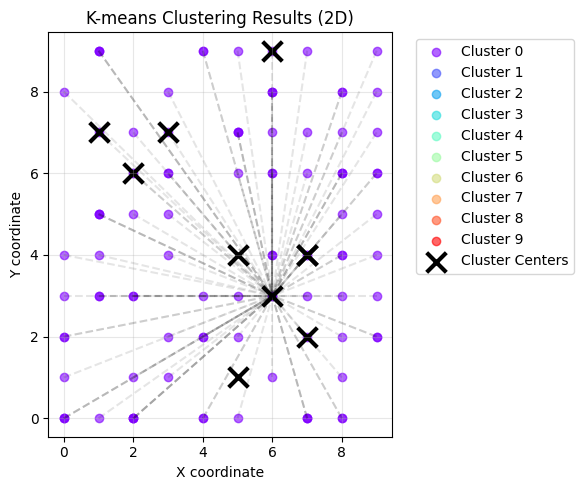

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Initialize parameters
K = 10  # number of clusters
N_points = 100

# Generate random 2D data
cluster_ind = np.zeros(N_points, dtype=int)
cluster_centers = np.random.randint(0, 10, size=(K, 2))  # 2D centers
points = np.random.randint(0, 10, size=(N_points, 2))  # 2D points

# Calculate initial loss
initial_loss = sum(
    np.linalg.norm(points[i] - cluster_centers[cluster_ind[i]]) for i in range(N_points)
)
print(f"Initial sum of squared distances: {initial_loss:.4f}")

plot(cluster_ind, cluster_centers, points)

### Run K-means

In [5]:
# Run K-means
cluster_ind, cluster_centers = k_means(points, K, max_iters=20)

[0] Loss: 3.1862145918989446
[2] Loss: 1.501128128518676
[4] Loss: 1.3843151886839244
[6] Loss: 1.499887287416739
[8] Loss: 1.499887287416739
[10] Loss: 1.499887287416739
[12] Loss: 1.499887287416739
[14] Loss: 1.499887287416739
[16] Loss: 1.499887287416739
[18] Loss: 1.499887287416739


## Validate Results
Check if the clustering results are correct

In [6]:
# Calculate final loss
final_loss = sum(
    np.linalg.norm(points[i] - cluster_centers[cluster_ind[i]]) for i in range(N_points)
)
print(f"Final sum of squared distances: {final_loss:.4f}")


# Verify cluster assignments
def verify_clusters():
    for i in range(N_points):
        # Check if point is assigned to the nearest center
        distances = np.array(
            [np.linalg.norm(points[i] - cluster_centers[k]) for k in range(K)]
        )
        nearest_cluster = np.argmin(distances)

        if nearest_cluster != cluster_ind[i]:
            print(
                f"Point {points[i]} is incorrectly assigned to cluster {cluster_ind[i]}"
            )
            print(f"Should be assigned to cluster {nearest_cluster}")
            raise Exception("Cluster assignments are incorrect.")
        elif i % 10 == 0:  # Changed from 100 to 10 to see more examples
            print(
                f"Point ({points[i][0]}, {points[i][1]}) is correctly assigned to "
                f"cluster {cluster_ind[i]} with center at "
                f"({cluster_centers[cluster_ind[i]][0]:.2f}, "
                f"{cluster_centers[cluster_ind[i]][1]:.2f})"
            )
            print(f"Distance to center: {distances[cluster_ind[i]]:.2f}")


verify_clusters()

Final sum of squared distances: 119.5777
Point (4, 0) is correctly assigned to cluster 5 with center at (2.00, 0.00)
Distance to center: 2.00
Point (8, 1) is correctly assigned to cluster 1 with center at (7.00, 0.00)
Distance to center: 1.41
Point (3, 5) is correctly assigned to cluster 8 with center at (5.00, 5.00)
Distance to center: 2.00
Point (6, 8) is correctly assigned to cluster 2 with center at (5.00, 8.00)
Distance to center: 1.00
Point (1, 0) is correctly assigned to cluster 5 with center at (2.00, 0.00)
Distance to center: 1.00
Point (9, 9) is correctly assigned to cluster 4 with center at (8.00, 6.00)
Distance to center: 3.16
Point (9, 6) is correctly assigned to cluster 4 with center at (8.00, 6.00)
Distance to center: 1.00
Point (5, 7) is correctly assigned to cluster 2 with center at (5.00, 8.00)
Distance to center: 1.00
Point (6, 4) is correctly assigned to cluster 8 with center at (5.00, 5.00)
Distance to center: 1.41
Point (5, 0) is correctly assigned to cluster 1 wi

## Verify the clustering results after running K-means algorithm

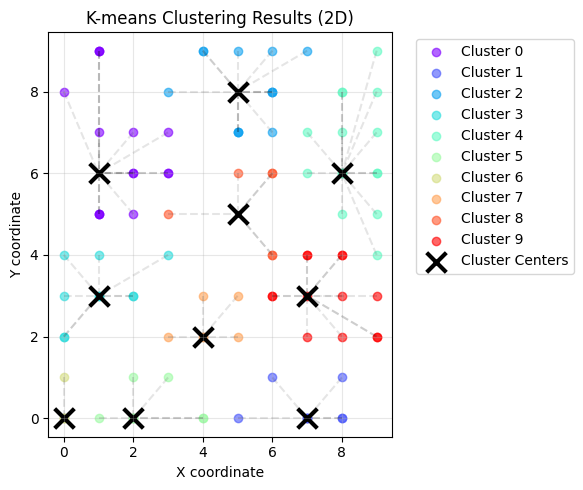

In [7]:
plot(cluster_ind, cluster_centers, points)